# **Model Selection**

## **Data preparation**

In [2]:
import pandas as pd
import numpy as np

In [3]:
ds = pd.read_csv('bdata_dummies.csv')

In [4]:
ds

,book_authors,book_title,book_desc,book_rating,book_rating_count,book_review_count,genres,anger,fear,happiness,sadness,surprise,emotion_index,16th Century,18th Century,19th Century,20th Century,21st Century,Abandoned,Abuse,Academic,Action,Adoption,Adult,Adult Fiction,Adventure,Africa,African American,African American Literature,Aliens,Alternate History,Amazon,American,American Civil War,American History,American Revolution,Americana,Amish,Ancient,Ancient History,...,Transgender,Travel,True Crime,True Story,Tudor Period,Turkish,Turkish Literature,Ukraine,Unfinished,Urban,Urban Fantasy,Vampires,Vegan,Vegetarian,Vegetarianism,Victorian,Video Games,War,Warfare,Weird Fiction,Werewolves,Western Africa,Western Romance,Westerns,Wildlife,Witchcraft,Witches,Wolves,Womens,Womens Fiction,World History,World War I,World War II,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Paranormal,Young Adult Romance,Zombies
0,Suzanne Collins,The Hunger Games,Winning will make you famous. Losing means cer...,4.33,5519135,160706,Young Adult|Fiction|Science Fiction|Dystopia|F...,0.07,0.48,0.07,0.30,0.07,0.198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,J.K. Rowling,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,4.48,2041594,33264,Fantasy|Young Adult|Fiction,0.04,0.59,0.07,0.11,0.19,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Harper Lee,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,4.27,3745197,79450,Classics|Fiction|Historical|Historical Fiction...,0.00,0.30,0.11,0.30,0.30,0.202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Stephenie Meyer,Twilight,About three things I was absolutely positive.F...,3.58,4281268,97991,Young Adult|Fantasy|Romance|Paranormal|Vampire...,0.10,0.20,0.20,0.20,0.30,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Markus Zusak,The Book Thief,Trying to make sense of the horrors of World W...,4.36,1485632,100821,Historical|Historical Fiction|Fiction|Young Adult,0.12,0.12,0.00,0.12,0.62,0.196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,Steve Kluger,My Most Excellent Year,Dear Anthony:I appreciate your recent interest...,4.04,7279,1072,Young Adult|Fiction|Romance|Lgbt|Contemporary|...,0.08,0.23,0.38,0.08,0.23,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4747,Kimberly Derting,Desires of the Dead,The missing dead call to Violet. They want to ...,4.06,22320,1605,Mystery|Romance|Fantasy|Young Adult|Fantasy|Su...,0.00,0.45,0.07,0.24,0.24,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4748,Eva Ibbotson,The Dragonfly Pool,Tally Hamilton is furious to hear she is being...,4.00,3799,418,Historical|Historical Fiction|Young Adult|Chil...,0.04,0.46,0.19,0.19,0.12,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4749,Fábio Moon,Daytripper,What are the most important days of your life?...,4.30,21965,2029,Sequential Art|Graphic Novels|Sequential Art|C...,0.03,0.32,0

In [5]:
columns = ds.columns.drop(labels=['book_title', 'book_authors', 'book_desc', 
                                  'book_title', 'genres', 'emotion_index', 
                                  'book_rating', 'book_rating_count', 
                                  'book_review_count'])

In [6]:
X = ds[[c for c in columns]]
y = ds['book_rating']

## **Correlation**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

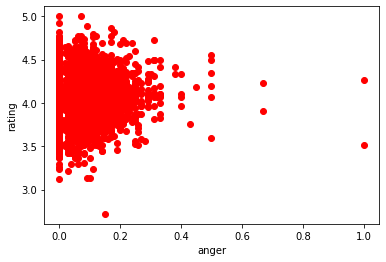

In [8]:
plt.xlabel('anger')
plt.ylabel('rating')
plt.scatter(ds['anger'], ds['book_rating'], color='red')

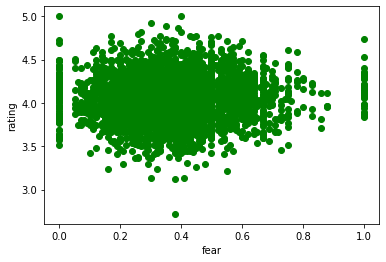

In [9]:
plt.xlabel('fear')
plt.ylabel('rating')
plt.scatter(ds['fear'], ds['book_rating'], color='green')

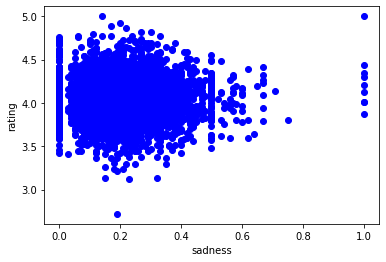

In [10]:
plt.xlabel('sadness')
plt.ylabel('rating')
plt.scatter(ds['sadness'], ds['book_rating'], color='blue')

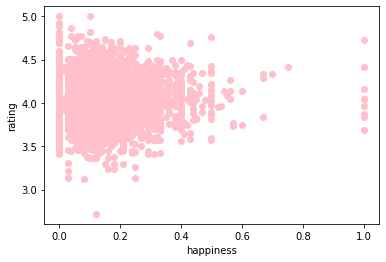

In [11]:
plt.xlabel('happiness')
plt.ylabel('rating')
plt.scatter(ds['happiness'], ds['book_rating'], color='pink')

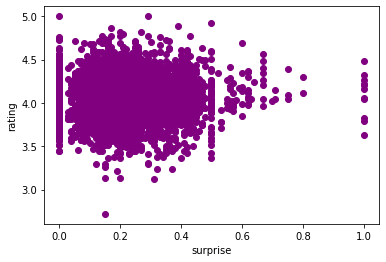

In [14]:
plt.xlabel('surprise')
plt.ylabel('rating')
plt.scatter(ds['surprise'], ds['book_rating'], color='purple')

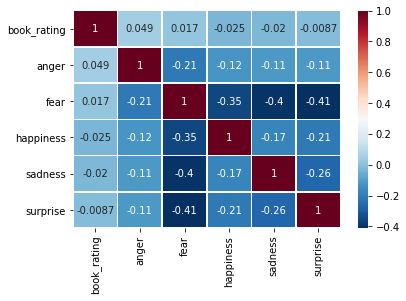

In [13]:
pearsoncorr = ds[['book_rating', 'anger', 'fear', 'happiness', 
                  'sadness', 'surprise']].corr(method='pearson')
sb.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, 
           yticklabels=pearsoncorr.columns, cmap='RdBu_r', 
           annot=True, linewidth=0.5)

## **K-Fold Cross-validation**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

### **Choosing parameters**

#### *Ridge*

In [17]:
mdl_rd_cv = RidgeCV(alphas=[0.1, 1, 10, 50, 100, 900, 1e3, 1e6], store_cv_values=True).fit(X, y)
rd_alpha = mdl_rd_cv.alpha_
rd_alpha

10.0

#### *Lasso*

In [20]:
mdl_ls_cv = LassoCV(cv=cv, n_jobs=-1).fit(X, y)
ls_alpha = mdl_ls_cv.alpha_
ls_alpha

0.00016510663276418522

#### *Elastic Net*

In [21]:
mdl_en_cv = ElasticNetCV(l1_ratio=[1, 0.5, 0.2, 0.3, 0.4, 0.01], n_alphas=100, cv=cv, n_jobs=-1).fit(X, y)
en_alpha = mdl_en_cv.alpha_
en_l1 = mdl_en_cv.l1_ratio_
print(en_l1)
print(en_alpha)

0.01
0.0030937968510334124


#### *Decision Tree*

In [24]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth': depths, 
               'decisiontreeregressor__min_samples_leaf': num_leafs}]
gs_dt = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, 
                     scoring=scorer, cv=10).fit(X, y)
gs_dt_params = gs_dt.best_params_
gs_dt_params

{'decisiontreeregressor__max_depth': 7,
 'decisiontreeregressor__min_samples_leaf': 10}

#### *Random Forest*

In [25]:
param_grid = {'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 
              'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 
              'min_samples_split': [8, 10, 12], 
              'n_estimators': [100, 200, 300, 1000]}
mdl_rf_cv = RandomForestRegressor()
gs_rf = GridSearchCV(estimator = mdl_rf_cv, param_grid = param_grid, 
                     cv = 10, n_jobs = -1, verbose = 2).fit(X, y)
gs_rf_params = gs_rf.best_params_
gs_rf_params

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 28.9min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

### **Cross-validation implementation**

In [30]:
results_kf = {'model': ['linear regression', 'ridge', 'lasso', 
                       'elastic net', 'decision tree', 'random forest'], 
           'fit_time': [],
           'score_time': [],
           'test_r2': [],
           'test_mse': [],
           'test_rmse': []}

In [31]:
def cross_val(model, results):
  model.fit(X, y)
  scores = cross_validate(model, X, y, 
                          scoring=('r2', 'neg_mean_squared_error'), 
                          cv=cv, n_jobs=-1)
  results['fit_time'].append(np.mean(scores['fit_time']))
  results['score_time'].append(np.mean(scores['score_time']))
  results['test_r2'].append(np.mean(scores['test_r2']))
  results['test_mse'].append(np.abs(np.mean(scores['test_neg_mean_squared_error'])))
  results['test_rmse'].append(np.sqrt(np.abs(np.mean(scores['test_neg_mean_squared_error']))))
  return results

In [34]:
models = [LinearRegression(), Ridge(alpha=rd_alpha), Lasso(alpha=ls_alpha), 
          ElasticNet(alpha=en_alpha, l1_ratio=en_l1), 
          DecisionTreeRegressor(criterion='mse', 
                                max_depth=gs_dt_params['decisiontreeregressor__max_depth'], 
                                min_samples_leaf=gs_dt_params['decisiontreeregressor__min_samples_leaf']), 
          RandomForestRegressor(n_estimators=gs_rf_params['n_estimators'], criterion='mse', max_depth=gs_rf_params['max_depth'], 
                               min_samples_split=gs_rf_params['min_samples_split'], min_samples_leaf=gs_rf_params['min_samples_leaf'], 
                                max_features=gs_rf_params['max_features'], bootstrap=gs_rf_params['bootstrap'])]
for m in models:
  cross_val(m, results_kf)

In [35]:
results_kf

{'fit_time': [0.33081152439117434,
  0.0855320930480957,
  0.2974380016326904,
  0.219018292427063,
  0.09951786994934082,
  0.9896657466888428],
 'model': ['linear regression',
  'ridge',
  'lasso',
  'elastic net',
  'decision tree',
  'random forest'],
 'score_time': [0.004767608642578125,
  0.005186891555786133,
  0.005107235908508301,
  0.004914927482604981,
  0.004800176620483399,
  0.04377467632293701],
 'test_mse': [3.7809180836344476e+20,
  0.04638897550676446,
  0.04665076808237477,
  0.04634003770406117,
  0.04985173839195582,
  0.054722655904868675],
 'test_r2': [-7.110937955249327e+21,
  0.18591969284576632,
  0.18120372584653033,
  0.18669907050026543,
  0.12477353825302902,
  0.03927386088058852],
 'test_rmse': [19444583008.21709,
  0.21538100080268097,
  0.21598788874002814,
  0.2152673633044758,
  0.22327502859020268,
  0.23392874108340914]}

In [52]:
cv_results = pd.DataFrame(results_kf)

In [53]:
cv_results

,model,fit_time,score_time,test_r2,test_mse,test_rmse
0,linear regression,0.330812,0.004768,-7.110938e+21,3.780918e+20,1.944458e+10
1,ridge,0.085532,0.005187,1.859197e-01,4.638898e-02,2.153810e-01
2,lasso,0.297438,0.005107,1.812037e-01,4.665077e-02,2.159879e-01
3,elastic net,0.219018,0.004915,1.866991e-01,4.634004e-02,2.152674e-01
4,decision tree,0.099518,0.004800,1.247735e-01,4.985174e-02,2.232750e-01
5,random forest,0.989666,0.043775,3.927386e-02,5.472266e-02,2.339287e-01


In [54]:
cv_results.drop(['test_rmse'], axis=1)

,model,fit_time,score_time,test_r2,test_mse
0,linear regression,0.330812,0.004768,-7.110938e+21,3.780918e+20
1,ridge,0.085532,0.005187,1.859197e-01,4.638898e-02
2,lasso,0.297438,0.005107,1.812037e-01,4.665077e-02
3,elastic net,0.219018,0.004915,1.866991e-01,4.634004e-02
4,decision tree,0.099518,0.004800,1.247735e-01,4.985174e-02
5,random forest,0.989666,0.043775,3.927386e-02,5.472266e-02


## **Model loading**

In [59]:
import pickle

In [57]:
model = ElasticNet(alpha=en_alpha, l1_ratio=en_l1)
model.fit(X, y)

ElasticNet(alpha=0.0030937968510334124, copy_X=True, fit_intercept=True,
           l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [60]:
pickle.dump(model, open('model.pkl','wb'))

## **check**

In [61]:
X_check = ds[['anger', 'fear', 'sadness', 'happiness', 'surprise']]
y_check = y

In [165]:
model_check = ElasticNet(alpha=en_alpha, l1_ratio=en_l1)
model_check.fit(X_check, y_check)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [168]:
df = pd.DataFrame({'anger': [0.4], 'fear': [0.3], 'sadness': [0.1], 'happiness': [0.0], 'surprise': [0.2]})

In [169]:
model_check.predict(df)

array([4.36272727])